In [1]:
import pandas as pd
import numpy as np
import fsspec

import re
import nltk
from nltk.corpus import stopwords  
import textblob
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import gensim
from gensim.models import word2vec

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mahi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/mahi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
cf_ebl = pd.read_csv('../CrisisNLP_labeled_data_crowdflower/2014_ebola_cf/2014_ebola_CF_labeled_data.tsv', sep='\t', engine='python')
cf_ebl.head()

,tweet_id,tweet_text,label
0,'497671828195008512',RT @QuestionsNG: Ebola is not gonna come close...,other_useful_information
1,'522457018863726592',It's too funny to watch MSNBC put an infectiou...,treatment
2,'523158748958031873',RT @mikecalma: How the #GOP fights infectious ...,other_useful_information
3,'522494238815031296',@drbrainbugz it's all about spin! Guaranteed t...,other_useful_information
4,'523510656771698689',WHO officially declares that #Senegal has ende...,disease_transmission


In [5]:
me_syn = pd.read_csv('../CrisisNLP_labeled_data_crowdflower/2014_Middle_East_Respiratory_Syndrome_en/2014_MERS_en_CF_labeled_data.tsv', sep='\t', engine='python')
me_syn.head()

,tweet_id,tweet_text,label
0,'462764820425474048',10 Questions on the Deadly Middle Eastern Viru...,other_useful_information
1,'462301970250756096',RT @Fla_Medic: AFD Blog `Voting On #MERS #Tran...,other_useful_information
2,'462769943659151361',RT @ECDC_MSprenger: MERS-CoV: most important t...,prevention
3,'461470349398642688',RT @makoto_au_japon: #Canada: Six questions an...,other_useful_information
4,'464498271319523329',Well phew. MT @ECDC_EU #MERS update: @WHO says...,disease_transmission


In [6]:
eq_df = pd.concat([cf_ebl, me_syn], ignore_index=True)
eq_df

,tweet_id,tweet_text,label
0,'497671828195008512',RT @QuestionsNG: Ebola is not gonna come close...,other_useful_information
1,'522457018863726592',It's too funny to watch MSNBC put an infectiou...,treatment
2,'523158748958031873',RT @mikecalma: How the #GOP fights infectious ...,other_useful_information
3,'522494238815031296',@drbrainbugz it's all about spin! Guaranteed t...,other_useful_information
4,'523510656771698689',WHO officially declares that #Senegal has ende...,disease_transmission
...,...,...,...
3127,'475580075157757952',Scientists question #Saudi openness on deadly ...,other_useful_information
3128,'468860907280666626',Newest US #MERS case was infected by Indiana p...,affected_people
3129,'468067976143708160',2 in Florida Show Symptoms of Deadly Middle Ea...,disease_signs_or_symptoms
3130,'465227677863931904',CDC: Infection Prevention &amp; Control Recomm...,affected_people


In [7]:
eq_df['tweet_text']

0       RT @QuestionsNG: Ebola is not gonna come close...
1       It's too funny to watch MSNBC put an infectiou...
2       RT @mikecalma: How the #GOP fights infectious ...
3       @drbrainbugz it's all about spin! Guaranteed t...
4       WHO officially declares that #Senegal has ende...
                              ...                        
3127    Scientists question #Saudi openness on deadly ...
3128    Newest US #MERS case was infected by Indiana p...
3129    2 in Florida Show Symptoms of Deadly Middle Ea...
3130    CDC: Infection Prevention &amp; Control Recomm...
3131    ( #JulioGarcia_x3 ) 10 Questions on the Deadly...
Name: tweet_text, Length: 3132, dtype: object

In [8]:
eq_df['tweet_text'] = eq_df['tweet_text'].str.replace(',', '')
del eq_df['tweet_id']

In [9]:
eq_df['tokenized_text'] = eq_df['tweet_text'].apply(nltk.word_tokenize)
stop_words = set(stopwords.words('english'))
new_final_words = []
for i in list(eq_df['tokenized_text']):
    new_words = []
    for j in i:
        if not j in stop_words:
            new_words.append(j)
    new_final_words.append(new_words)

eq_df['tokenized_text'] = new_final_words



In [10]:
eq_df['tokenized_text']

0       [RT, @, QuestionsNG, :, Ebola, gon, na, come, ...
1       [It, 's, funny, watch, MSNBC, put, infectious,...
2       [RT, @, mikecalma, :, How, #, GOP, fights, inf...
3       [@, drbrainbugz, 's, spin, !, Guaranteed, tho,...
4       [WHO, officially, declares, #, Senegal, ended,...
                              ...                        
3127    [Scientists, question, #, Saudi, openness, dea...
3128    [Newest, US, #, MERS, case, infected, Indiana,...
3129    [2, Florida, Show, Symptoms, Deadly, Middle, E...
3130    [CDC, :, Infection, Prevention, &, amp, ;, Con...
3131    [(, #, JulioGarcia_x3, ), 10, Questions, Deadl...
Name: tokenized_text, Length: 3132, dtype: object

vectorizer = CountVectorizer()

tokenized_text = []
for i in range(0, len(list(eq_df['tokenized_text']))):
    vectorizer.fit_transform(eq_df['tweet_text'][i:i+1])
    tokenized_text.append(vectorizer.get_feature_names())

eq_df['tokenized_text'] = tokenized_text

In [11]:
eq_df['Subjectivity'] = pd.Series([textblob.TextBlob(x).sentiment.subjectivity for x in eq_df['tweet_text']])

In [12]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity
0,RT @QuestionsNG: Ebola is not gonna come close...,other_useful_information,"[RT, @, QuestionsNG, :, Ebola, gon, na, come, ...",0.0
1,It's too funny to watch MSNBC put an infectiou...,treatment,"[It, 's, funny, watch, MSNBC, put, infectious,...",1.0
2,RT @mikecalma: How the #GOP fights infectious ...,other_useful_information,"[RT, @, mikecalma, :, How, #, GOP, fights, inf...",0.0
3,@drbrainbugz it's all about spin! Guaranteed t...,other_useful_information,"[@, drbrainbugz, 's, spin, !, Guaranteed, tho,...",0.0
4,WHO officially declares that #Senegal has ende...,disease_transmission,"[WHO, officially, declares, #, Senegal, ended,...",0.0
...,...,...,...,...
3127,Scientists question #Saudi openness on deadly ...,other_useful_information,"[Scientists, question, #, Saudi, openness, dea...",0.4
3128,Newest US #MERS case was infected by Indiana p...,affected_people,"[Newest, US, #, MERS, case, infected, Indiana,...",0.0
3129,2 in Florida Show Symptoms of Deadly Middle Ea...,disease_signs_or_symptoms,"[2, Florida, Show, Symptoms, Deadly, Middle, E...",0.0
3130,CDC: Infection Prevention &amp; Control Recomm...,affected_people,"[CDC, :, Infection, Prevention, &, amp, ;, Con...",0.0


In [13]:
b = [textblob.TextBlob(x).tags for x in eq_df['tweet_text']]
nb_pronouns = []
for i in b:
    nb_pronouns.append(collections.Counter(k[1] for k in i)['PRP'] + collections.Counter(p[1] for p in i)['PRP$'])
eq_df['nb_pronouns'] = nb_pronouns

In [14]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns
0,RT @QuestionsNG: Ebola is not gonna come close...,other_useful_information,"[RT, @, QuestionsNG, :, Ebola, gon, na, come, ...",0.0,2
1,It's too funny to watch MSNBC put an infectiou...,treatment,"[It, 's, funny, watch, MSNBC, put, infectious,...",1.0,1
2,RT @mikecalma: How the #GOP fights infectious ...,other_useful_information,"[RT, @, mikecalma, :, How, #, GOP, fights, inf...",0.0,0
3,@drbrainbugz it's all about spin! Guaranteed t...,other_useful_information,"[@, drbrainbugz, 's, spin, !, Guaranteed, tho,...",0.0,1
4,WHO officially declares that #Senegal has ende...,disease_transmission,"[WHO, officially, declares, #, Senegal, ended,...",0.0,1
...,...,...,...,...,...
3127,Scientists question #Saudi openness on deadly ...,other_useful_information,"[Scientists, question, #, Saudi, openness, dea...",0.4,0
3128,Newest US #MERS case was infected by Indiana p...,affected_people,"[Newest, US, #, MERS, case, infected, Indiana,...",0.0,0
3129,2 in Florida Show Symptoms of Deadly Middle Ea...,disease_signs_or_symptoms,"[2, Florida, Show, Symptoms, Deadly, Middle, E...",0.0,0
3130,CDC: Infection Prevention &amp; Control Recomm...,affected_people,"[CDC, :, Infection, Prevention, &, amp, ;, Con...",0.0,0


In [15]:
nb_numerals = []
for j in list(eq_df['tokenized_text']):
    a = 0
    for i in j: 
        if i.isdigit() == True: 
            a += 1
    nb_numerals.append(a)

eq_df['nb_numerals'] = nb_numerals

In [16]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals
0,RT @QuestionsNG: Ebola is not gonna come close...,other_useful_information,"[RT, @, QuestionsNG, :, Ebola, gon, na, come, ...",0.0,2,0
1,It's too funny to watch MSNBC put an infectiou...,treatment,"[It, 's, funny, watch, MSNBC, put, infectious,...",1.0,1,0
2,RT @mikecalma: How the #GOP fights infectious ...,other_useful_information,"[RT, @, mikecalma, :, How, #, GOP, fights, inf...",0.0,0,0
3,@drbrainbugz it's all about spin! Guaranteed t...,other_useful_information,"[@, drbrainbugz, 's, spin, !, Guaranteed, tho,...",0.0,1,0
4,WHO officially declares that #Senegal has ende...,disease_transmission,"[WHO, officially, declares, #, Senegal, ended,...",0.0,1,0
...,...,...,...,...,...,...
3127,Scientists question #Saudi openness on deadly ...,other_useful_information,"[Scientists, question, #, Saudi, openness, dea...",0.4,0,0
3128,Newest US #MERS case was infected by Indiana p...,affected_people,"[Newest, US, #, MERS, case, infected, Indiana,...",0.0,0,0
3129,2 in Florida Show Symptoms of Deadly Middle Ea...,disease_signs_or_symptoms,"[2, Florida, Show, Symptoms, Deadly, Middle, E...",0.0,0,1
3130,CDC: Infection Prevention &amp; Control Recomm...,affected_people,"[CDC, :, Infection, Prevention, &, amp, ;, Con...",0.0,0,0


In [17]:
nb_exclm = []
for j in list(eq_df['tokenized_text']):
    c = 0
    for i in j: 
        if i == '!': 
            c += 1
    nb_exclm.append(c)

eq_df['nb_exclm'] = nb_exclm

In [18]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals,nb_exclm
0,RT @QuestionsNG: Ebola is not gonna come close...,other_useful_information,"[RT, @, QuestionsNG, :, Ebola, gon, na, come, ...",0.0,2,0,0
1,It's too funny to watch MSNBC put an infectiou...,treatment,"[It, 's, funny, watch, MSNBC, put, infectious,...",1.0,1,0,0
2,RT @mikecalma: How the #GOP fights infectious ...,other_useful_information,"[RT, @, mikecalma, :, How, #, GOP, fights, inf...",0.0,0,0,0
3,@drbrainbugz it's all about spin! Guaranteed t...,other_useful_information,"[@, drbrainbugz, 's, spin, !, Guaranteed, tho,...",0.0,1,0,1
4,WHO officially declares that #Senegal has ende...,disease_transmission,"[WHO, officially, declares, #, Senegal, ended,...",0.0,1,0,0
...,...,...,...,...,...,...,...
3127,Scientists question #Saudi openness on deadly ...,other_useful_information,"[Scientists, question, #, Saudi, openness, dea...",0.4,0,0,0
3128,Newest US #MERS case was infected by Indiana p...,affected_people,"[Newest, US, #, MERS, case, infected, Indiana,...",0.0,0,0,0
3129,2 in Florida Show Symptoms of Deadly Middle Ea...,disease_signs_or_symptoms,"[2, Florida, Show, Symptoms, Deadly, Middle, E...",0.0,0,1,0
3130,CDC: Infection Prevention &amp; Control Recomm...,affected_people,"[CDC, :, Infection, Prevention, &, amp, ;, Con...",0.0,0,0,0


In [19]:
nb_ques = []
for j in list(eq_df['tokenized_text']):
    d = 0
    for i in j: 
        if i == '?': 
            d += 1
    nb_ques.append(d)

eq_df['nb_ques'] = nb_ques

In [20]:
eq_df['nb_ques'].value_counts()

0     2754
1      320
2       42
3       10
4        4
10       1
6        1
Name: nb_ques, dtype: int64

In [21]:
mod_verbs = ['can', 'could', 'shall', 'will', 'should', 'must', 'would', 'may', 'might']
nb_mv = []
for j in list(eq_df['tokenized_text']):
    m = 0
    for i in j: 
        if str.lower(i) in mod_verbs: 
            m += 1
    nb_mv.append(m)

eq_df['count_modal_verbs'] = nb_mv

In [22]:
eq_df['count_modal_verbs'].value_counts()

0    2937
1     188
2       6
3       1
Name: count_modal_verbs, dtype: int64

In [23]:
wh_words = ['what', 'where', 'when', 'why', 'who', 'whom', 'which', 'how', 'whose']
nb_wh = []
for j in list(eq_df['tokenized_text']):
    w = 0
    for i in j: 
        if str.lower(i) in wh_words: 
            w += 1
    nb_wh.append(w)

eq_df['count_wh_words'] = nb_wh

In [24]:
eq_df['count_wh_words'].value_counts()

0    2791
1     309
2      32
Name: count_wh_words, dtype: int64

In [25]:
eq_df['polarity'] = pd.Series([textblob.TextBlob(x).sentiment.polarity for x in eq_df['tweet_text']])

In [26]:
eq_df

,tweet_text,label,tokenized_text,Subjectivity,nb_pronouns,nb_numerals,nb_exclm,nb_ques,count_modal_verbs,count_wh_words,polarity
0,RT @QuestionsNG: Ebola is not gonna come close...,other_useful_information,"[RT, @, QuestionsNG, :, Ebola, gon, na, come, ...",0.0,2,0,0,0,0,0,0.00
1,It's too funny to watch MSNBC put an infectiou...,treatment,"[It, 's, funny, watch, MSNBC, put, infectious,...",1.0,1,0,0,0,0,0,0.25
2,RT @mikecalma: How the #GOP fights infectious ...,other_useful_information,"[RT, @, mikecalma, :, How, #, GOP, fights, inf...",0.0,0,0,0,0,0,1,0.00
3,@drbrainbugz it's all about spin! Guaranteed t...,other_useful_information,"[@, drbrainbugz, 's, spin, !, Guaranteed, tho,...",0.0,1,0,1,0,0,1,0.00
4,WHO officially declares that #Senegal has ende...,disease_transmission,"[WHO, officially, declares, #, Senegal, ended,...",0.0,1,0,0,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...
3127,Scientists question #Saudi openness on deadly ...,other_useful_information,"[Scientists, question, #, Saudi, openness, dea...",0.4,0,0,0,0,0,0,-0.20
3128,Newest US #MERS case was infected by Indiana p...,affected_people,"[Newest, US, #, MERS, case, infected, Indiana,...",0.0,0,0,0,0,0,0,0.00
3129,2 in Florida Show Symptoms of Deadly Middle Ea...,disease_signs_or_symptoms,"[2, Florida, Show, Symptoms, Deadly, Middle, E...",0.0,0,1,0,0,0,0,0.00
3130,CDC: Infection Prevention &amp; Control Recomm...,affected_people,"[CDC, :, Infection, Prevention, &, amp, ;, Con...",0.0,0,0,0,0,0,0,0.00


In [27]:
file=open("slang.txt","r") 
slang=file.read() 
  
#seperating each line present in the file 
slang=slang.split('\n') 

slang_word=[] 
meaning=[] 
  
#store the slang words and meanings in different lists 
for line in slang: 
    temp=line.split("=") 
    slang_word.append(temp[0]) 
    meaning.append(temp[-1]) 
  
#replace the slang word with meaning 
nb_slang = []
for i in list(eq_df['tokenized_text']): 
    s = 0
    for j in i:
        if str.lower(j) in slang_word:
            s+=1
    nb_slang.append(s)

eq_df['nb_slang'] = nb_slang

In [28]:
eq_df['nb_slang'].value_counts()

0    3075
1      51
2       4
3       2
Name: nb_slang, dtype: int64

In [29]:
eq_df = eq_df.reindex(columns=['tweet_text', 'tokenized_text', 'Subjectivity', 'polarity', 'nb_pronouns',
'nb_numerals', 'nb_exclm', 'nb_ques', 'count_modal_verbs',
'count_wh_words', 'nb_slang', 'label'])

/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


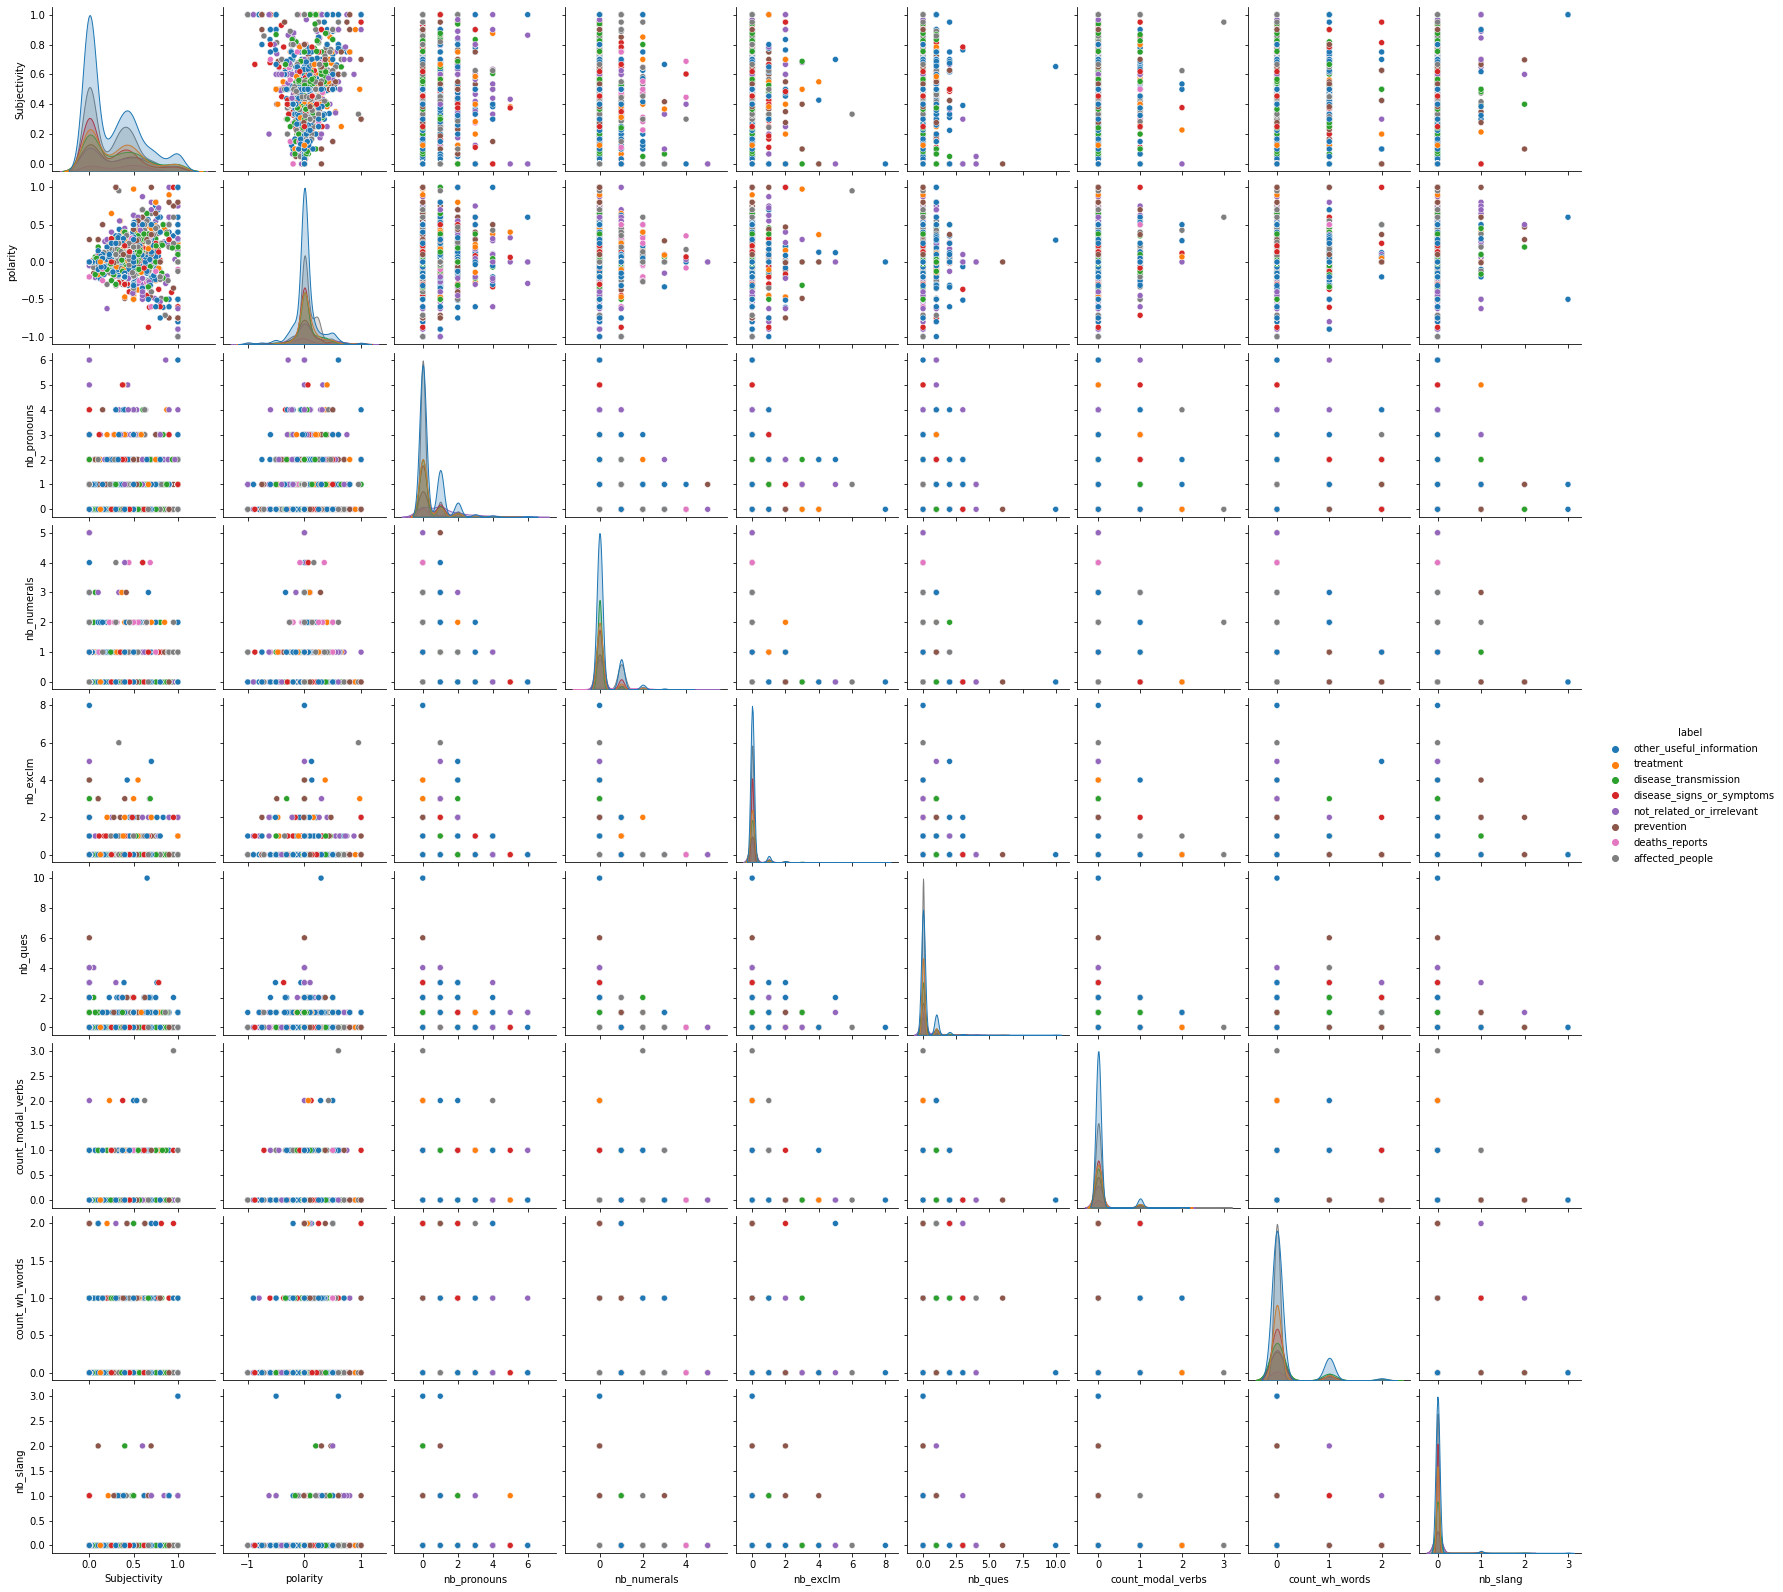

In [30]:
sns.pairplot(eq_df, hue='label', vars=['Subjectivity', 'polarity', 'nb_pronouns',
'nb_numerals', 'nb_exclm', 'nb_ques', 'count_modal_verbs',
'count_wh_words', 'nb_slang'])

In [31]:
svm_clf_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
X = eq_df.drop(['label', 'tweet_text', 'tokenized_text'], axis=1)
y = eq_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
svm_clf_rbf.fit(X_train, y_train)

rbf_pred = svm_clf_rbf.predict(X_test)

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (RBF Kernel):  30.56
F1 (RBF Kernel):  14.31


In [32]:
svm_clf_poly = svm.SVC(kernel='poly', degree=0.5, C=1)
X = eq_df.drop(['label', 'tweet_text', 'tokenized_text'], axis=1)
y = eq_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)
svm_clf_poly.fit(X_train, y_train)

poly_pred = svm_clf_rbf.predict(X_test)

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (POLY Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (POLY Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (POLY Kernel):  30.56
F1 (POLY Kernel):  14.31


In [33]:
rf_clf = RandomForestClassifier(max_depth=7, random_state=0)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy*100))
print('F1 (Random Forest): ', "%.2f" % (rf_f1*100))

Accuracy (Random Forest):  32.79
F1 (Random Forest):  23.70


In [34]:
tokens = [nltk.word_tokenize(tweet) for tweet in eq_df['tweet_text'].values]

In [35]:
tokens

[['RT',
  '@',
  'QuestionsNG',
  ':',
  'Ebola',
  'is',
  'not',
  'gon',
  'na',
  'come',
  'close',
  'to',
  'you',
  'your',
  'friends',
  '&',
  'amp',
  ';',
  'family',
  'members',
  'IJN',
  'RT',
  'to',
  'claim',
  '#',
  'FINE_GURL_by_meadow',
  '#',
  'SuegbeNakpako_by…'],
 ['It',
  "'s",
  'too',
  'funny',
  'to',
  'watch',
  'MSNBC',
  'put',
  'an',
  'infectious',
  'disease',
  'split',
  'a',
  'screen',
  'between',
  'an',
  'infectious',
  'disease',
  'doctor',
  'and',
  'a',
  'reporter',
  '.',
  '#',
  'derp',
  '#',
  'Ebola'],
 ['RT',
  '@',
  'mikecalma',
  ':',
  'How',
  'the',
  '#',
  'GOP',
  'fights',
  'infectious',
  'disease',
  '.',
  '#',
  'Ebola',
  'http',
  ':',
  '//t.co/AYEQvblXLU'],
 ['@',
  'drbrainbugz',
  'it',
  "'s",
  'all',
  'about',
  'spin',
  '!',
  'Guaranteed',
  'tho',
  'questions',
  'will',
  'be',
  'raised',
  're',
  '@',
  'WHO',
  'role',
  'post',
  '#',
  'ebola',
  'containment'],
 ['WHO',
  'officially',
 

In [36]:
model = word2vec.Word2Vec(size=32, min_count=1, workers=4)

In [37]:
model.build_vocab(tokens)

In [38]:
model.train(tokens, total_examples=len(tokens), epochs=4000)

(205072426, 285392000)

In [39]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list])

In [40]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(eq_df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['tweet_text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['tweet_text']), axis=1).values

X_train_word_average = word_averaging_list(model.wv,train_tokenized)
X_test_word_average = word_averaging_list(model.wv,test_tokenized)

<ipython-input-39-7024ffee7301>:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  mean.append(wv.syn0[wv.vocab[word].index])


In [41]:
logreg = LogisticRegression(n_jobs=1, C=1e5, solver='saga')
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred))

accuracy 0.5776595744680851
                           precision    recall  f1-score   support

          affected_people       0.64      0.68      0.66       168
           deaths_reports       0.33      0.20      0.25        20
disease_signs_or_symptoms       0.56      0.49      0.52       104
     disease_transmission       0.52      0.47      0.49        96
not_related_or_irrelevant       0.44      0.43      0.43        75
 other_useful_information       0.61      0.70      0.65       298
               prevention       0.55      0.38      0.45        77
                treatment       0.57      0.57      0.57       102

                 accuracy                           0.58       940
                macro avg       0.53      0.49      0.50       940
             weighted avg       0.57      0.58      0.57       940



/Users/mahi/.conda/envs/crisis_nlp_IST700.ipynb/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [42]:
classifier = MLPClassifier(alpha = 0.7, max_iter=400) 
classifier.fit(X_train_word_average, train['label'])
 
df_results = pd.DataFrame(data=np.zeros(shape=(1,3)), columns = ['classifier', 'train_score', 'test_score'] )
train_score = classifier.score(X_train_word_average, train['label'])
test_score = classifier.score(X_test_word_average, test['label'])
 
#print(classifier.predict_proba(X_test_word_average))
#print(classifier.predict(X_test_word_average))
 
df_results.loc[1,'classifier'] = "MLP"
df_results.loc[1,'train_score'] = train_score
df_results.loc[1,'test_score'] = test_score
print(df_results)

  classifier  train_score  test_score
0          0     0.000000    0.000000
1        MLP     0.626825    0.580851


In [43]:
eq_df.to_csv('for_bert_eq_data_vrs.csv')